In [5]:
import json
import matplotlib.pyplot as plt
import preprocess_snu_fact
import numpy as np

In [6]:
df = preprocess_snu_fact.load_df()
df

loaded facts 4700


,is_fact,score,issue_date,message
0,False,2,2017-03-29 11:11:34+09:00,"""대통령선거 본선에 나가기 직전에 사표를 제출하면 보궐선거는 없다"""
1,True,4,2017-04-19 18:05:27+09:00,“홍준표 ‘(지지율) 20% 넘어’ 발언은 선거법 위반”은 사실?
2,False,2,2017-04-19 18:08:45+09:00,"""문재인, 담뱃값 인하 입장 철회""는 사실?"
3,False,1,2017-04-19 18:25:30+09:00,"""안철수 국민의당 후보가 예비군 훈련을 한 번도 참석하지 않았다""는 다른 정당의 주..."
4,False,2,2017-04-19 18:40:48+09:00,"洪 ""한국, 비정규직 더 많고 직원 해고하기 세계에서 가장 어려워"""
...,...,...,...,...
4073,False,1,2024-05-07 15:29:52+09:00,"지금까지 13차례 특검이 도입됐지만, 여야 합의 없이 이뤄진 사례는 단 한 차례도 없다"
4074,False,2,2024-05-08 17:38:32+09:00,특검은 기존 수사가 종료된 이후에 도입한다
4075,True,5,2024-05-09 10:49:15+09:00,대한민국은 현재 교제 폭력을 따로 규제하는 법안이 없으며 법적 정의조차 모호하다
4076,True,5,2024-05-17 14:39:04+09:00,야당(민주당)도 집권기에 특검 반대했다


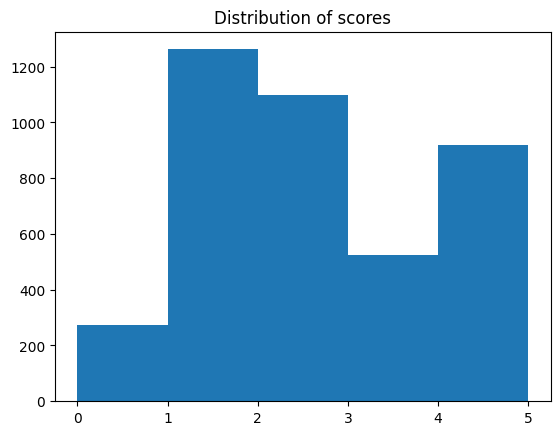

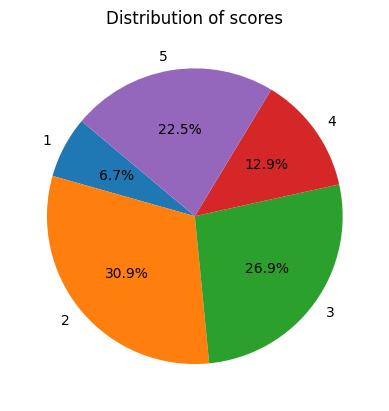

In [7]:
plt.title('Distribution of scores')
c, b, p = plt.hist(df['score'], bins=5)
plt.show()

plt.title('Distribution of scores')
labels = [f'{b[i]:.1f} - {b[i+1]:.1f}' for i in range(len(b)-1)]
plt.pie(c, labels=[f'{i+1}' for i in range(len(c))], autopct='%1.1f%%', startangle=140)
plt.show()

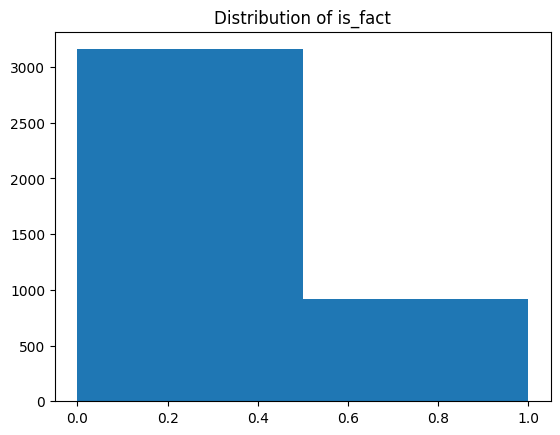

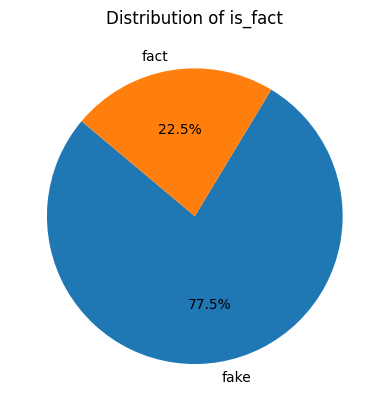

fact percent 22.53555655479431


In [8]:
plt.title('Distribution of is_fact')
xs = df['is_fact'].to_numpy().astype(np.int32)

c, b, p = plt.hist(xs, bins=2)
plt.show()

plt.title('Distribution of is_fact')
labels = [f'{b[i]:.1f} - {b[i+1]:.1f}' for i in range(len(b)-1)]
plt.pie(c, labels=['fake', 'fact'], autopct='%1.1f%%', startangle=140)
plt.show()

print('fact percent', df['is_fact'].to_numpy().astype(np.float32).mean() * 100)

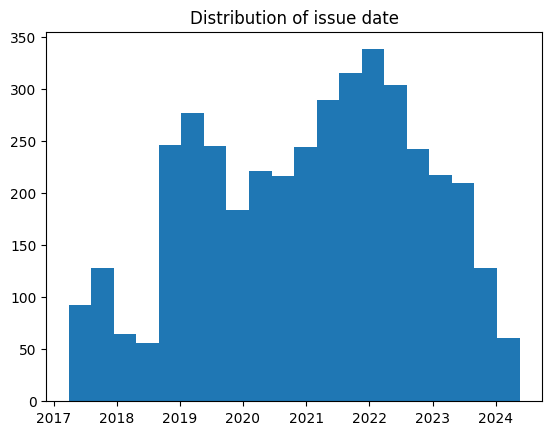

In [9]:
plt.title('Distribution of issue date')
plt.hist(df['issue_date'], bins=20)
plt.show()

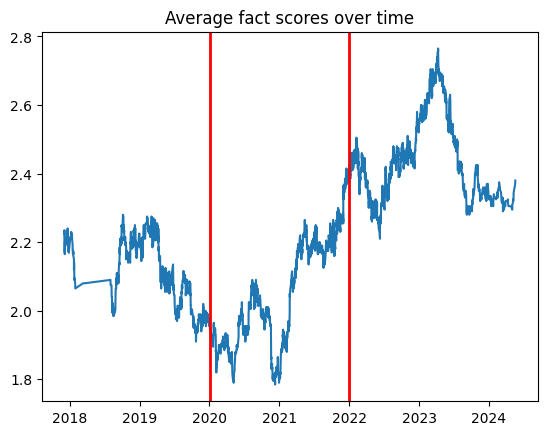

In [18]:
from datetime import datetime

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

ma_window_size = 200

ys = df['score'].to_numpy()
ys = moving_average(ys, ma_window_size)
xs = df['issue_date'][ma_window_size-1:]

plt.title('Average fact scores over time')
plt.plot(xs, ys)
plt.axvline(datetime(2020, 1, 1, 0, 0, 0), color='red', linewidth=2.0)
plt.axvline(datetime(2022, 1, 1, 0, 0, 0), color='red', linewidth=2.0)
plt.annotate('COVID-19', (datetime(2020, 3, 1, 0, 0, 0), 2.95), fontsize=16)
plt.show()

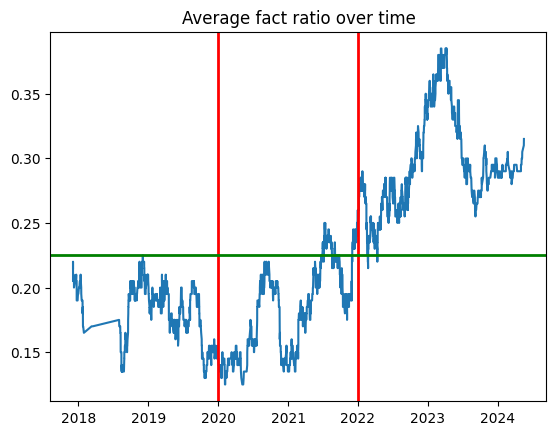

In [17]:
ma_window_size = 200

ys = df['is_fact'].to_numpy().astype(np.float32)
ys = moving_average(ys, ma_window_size)
xs = df['issue_date'][ma_window_size-1:]

plt.title('Average fact ratio over time')
plt.plot(xs, ys)
plt.axvline(datetime(2020, 1, 1, 0, 0, 0), color='red', linewidth=2.0)
plt.axvline(datetime(2022, 1, 1, 0, 0, 0), color='red', linewidth=2.0)
plt.axhline(0.225, color='green', linewidth=2.0)
plt.annotate('COVID-19', (datetime(2020, 3, 1, 0, 0, 0), 0.4), fontsize=16)
plt.show()